# Проект 3: Статистический анализ данных

## План

1. Загрузить данные и получить общую информацию о таблицах
2. Обработать сырые данные: 
    1) найти пропуски, если они есть
    2) обработать дубликаты в данных
3. Провести исследовательский анализ данных:
    1) убрать из выборки редкие значения, которые могут приводить к выбросам;
    2) найти частоту встречаемости городов
    3) определить соотношение пользователей с подпиской и без
    4) исследовать информацию о возрасте пользователей
    5) найти среднее растстояние, которое пользователь проезжает за 1 поездку
    6) найти среднюю продолжительность поездок
4. Обьеденить таблицы:
    1) обьеденить все таблицы в одну
    2) создать две дополнительные таблицы: пользователи с подпиской и без
    3) визуализировать информацию для обеих категорий
5. Подсчитать выручку:
    1) создать датафрейм с агрегированными данными
    2) подсчитать помесячную выручку приносимую каждым клиентом
6. Проверить следующие гипотизы:
    1) тратят ли пользователи с подпиской больше времени на поездки чем пользователи без подписок
    2) превышает ли среднее расстояние пользователей с подпиской 3130
    3) Будет ли помесячная выручка от пользователей с подпиской выше чем у пользователей без подписки
7. Решить задачи на распределения
8. написать общий вывод

## Загрузка данных

In [1]:
import pandas as pd

In [2]:
try:
    users_data = pd.read_csv('../datasets/users_go.csv')
except:
    users_data = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
try:
    rides_data = pd.read_csv('../datasets/rides_go.csv')
except:
    rides_data = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
try:
    subscriptions_data = pd.read_csv('../datasets/subscriptions_go.csv')
except:
    subscriptions_data = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

In [3]:
display(users_data.head(10))
display(subscriptions_data.head(10))
display(rides_data.head(10))

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [4]:
display(users_data.info())
display(rides_data.info())
display(subscriptions_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


None

## Предобработка данных

In [5]:
rides_data['date'] = pd.to_datetime(rides_data['date'], format='%Y-%m-%d')
display(rides_data.head())
rides_data.info()

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


In [6]:
rides_data['month'] = rides_data['date'].dt.month
rides_data.head()

,user_id,distance,duration,date,month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


### Работа с дубликатами

In [7]:
display(users_data.duplicated().sum())
rides_data.duplicated().sum()

31

0

Удалены явные дубликаты в таблице users_go. Есть дубликаты людей с разными id (совпадают поля имя, возраст, город, тип подписки. Такиз дубликатов 27), однако людей с разными id, будем считать разными людьми.

In [8]:
users_data = users_data.drop_duplicates().reset_index(drop=True)
display(users_data.duplicated().sum())
users_data.info()

0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [9]:
users_data.loc[:,'name':'subscription_type'].duplicated().sum()

27

### Проверка на пропуски

In [10]:
users_data.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [11]:
rides_data.isna().sum()

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

In [12]:
display(users_data['name'].unique())
display(users_data['city'].unique())
display(users_data['subscription_type'].unique())

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

array(['ultra', 'free'], dtype=object)

Кроме дубликатов в таблице users_go проблем в данных не найдено.

## Исследовательский анализ данных

### Отсекаем маловстречающиеся значения. 

In [13]:
(
    users_data['age']
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
)

0.0012    12.0000
0.0100    14.0000
0.5000    25.0000
0.9900    35.0000
0.9988    38.1604
Name: age, dtype: float64

In [14]:
users_data_new = users_data[(users_data['age'] > 12) & (users_data['age'] < 38)]
users_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1525 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1525 non-null   int64 
 1   name               1525 non-null   object
 2   age                1525 non-null   int64 
 3   city               1525 non-null   object
 4   subscription_type  1525 non-null   object
dtypes: int64(2), object(3)
memory usage: 71.5+ KB


После отсечения редких данных потеряно меньше 1% данных.

In [15]:
(
    rides_data[['distance', 'duration']]
    .quantile([0.0012, 0.01, .5, .99, .9988]) # выбираем размах в 0,9976 квантилей 
    .style.format("{:,.2f}")
)

,distance,duration
0.0012,36.38,0.50
0.01,208.08,3.98
0.5,"3,133.61",17.68
0.99,"5,478.62",32.50
0.9988,"6,251.50",35.43


In [16]:
rides_data_new = rides_data[(rides_data['distance'] >= 200) & 
                            (rides_data['distance'] <= 5500) & 
                            (rides_data['duration'] >= 3.5) &
                            (rides_data['duration'] <= 32.5)]
rides_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17453 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   17453 non-null  int64         
 1   distance  17453 non-null  float64       
 2   duration  17453 non-null  float64       
 3   date      17453 non-null  datetime64[ns]
 4   month     17453 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 818.1 KB


После отсечения редких данных потеряно порядка 2%.

### Часота встречаемости городов

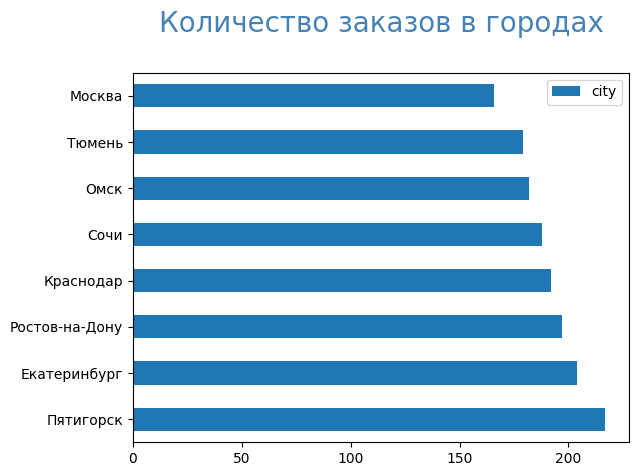

In [17]:
users_data_new['city'].value_counts()\
    .to_frame()\
    .plot(kind='barh')\
    .set_title('Количество заказов в городах' + "\n", fontsize=20, color='SteelBlue');

In [18]:
users_data_new['city'].value_counts()

Пятигорск         217
Екатеринбург      204
Ростов-на-Дону    197
Краснодар         192
Сочи              188
Омск              182
Тюмень            179
Москва            166
Name: city, dtype: int64

### Соотношение пользователей с подпиской и без

Отношение количества пользователей с разными топом подписки к общему количеству пользователей.

In [19]:
display(users_data_new['subscription_type'].value_counts()[0] / users_data_new['subscription_type'].value_counts()[1])
display(users_data_new['subscription_type'].value_counts()[0] / users_data_new['subscription_type'].count())
users_data_new['subscription_type'].value_counts()[1] / users_data_new['subscription_type'].count()

1.197406340057637

0.5449180327868852

0.4550819672131148

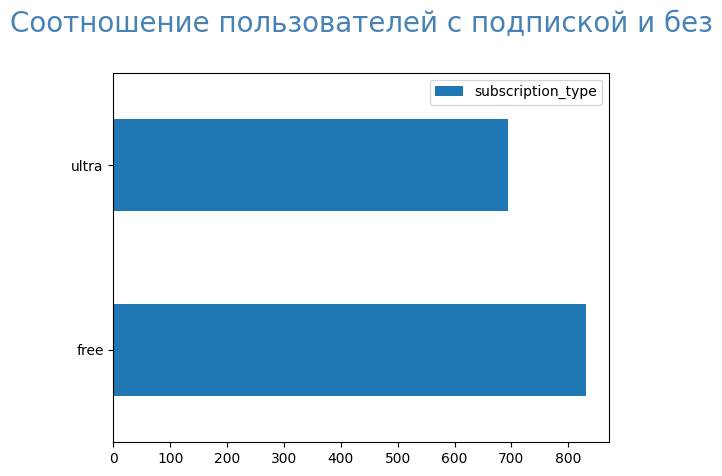

In [20]:
users_data_new['subscription_type'].value_counts()\
    .to_frame()\
    .plot(kind='barh')\
    .set_title('Соотношение пользователей с подпиской и без' + "\n", fontsize=20, color='SteelBlue');

Пользователей с подпиской примерно на 20% меньше чем без подписки.

### Возраст пользователей

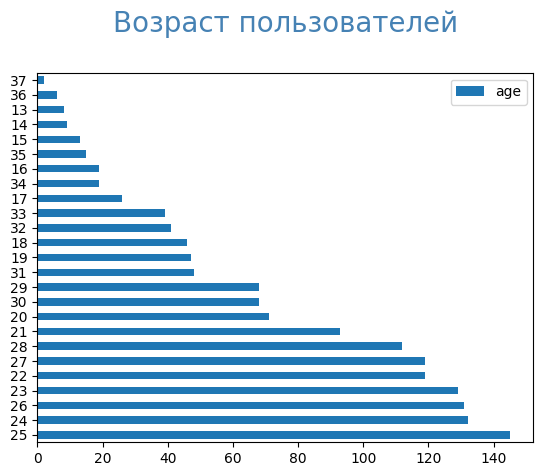

In [21]:
users_data_new['age'].value_counts()\
    .to_frame()\
    .plot(kind='barh')\
    .set_title('Возраст пользователей' + "\n", fontsize=20, color='SteelBlue');

In [22]:
users_data_new['age'].describe()

count    1525.000000
mean       24.890492
std         4.462053
min        13.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        37.000000
Name: age, dtype: float64

Половина пользователей имеют возраст от 22 до 28 лет, средний возраст примерно 25 лет.

### Расстояние и продолжительность поездок

In [23]:
rides_users = rides_data_new.pivot_table(index='user_id', values=['distance', 'duration'], aggfunc=['count', 'mean', 'median'])
rides_users.columns = ['count', 'count1', 'mean_distance', 'mean_duration', 'median_distance', 'median_duration']
rides_users = rides_users.drop('count1', axis=1)
rides_users

,count,mean_distance,mean_duration,median_distance,median_duration
user_id,,,,,
1,12,2839.181839,17.050409,2806.504429,16.233505
2,11,3087.641692,17.967662,3105.086678,18.779128
3,12,3075.633155,19.432793,2858.693148,19.835873
4,13,3091.361667,19.435896,3312.286135,20.302804
5,11,3232.449968,15.824903,3244.021903,14.904990
...,...,...,...,...,...
1530,15,3101.275929,18.323708,3005.013990,16.859991
1531,23,2915.425836,17.747487,2999.913238,18.308701
1532,13,2607.861784,16.320011,2615.477834,14.846434


count    1534.000000
mean     3119.903263
std       337.313148
min      1234.763317
25%      2916.258691
50%      3122.917230
75%      3322.734908
max      4331.893867
Name: median_distance, dtype: float64

<AxesSubplot:>

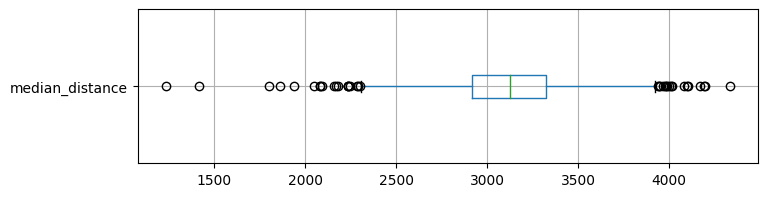

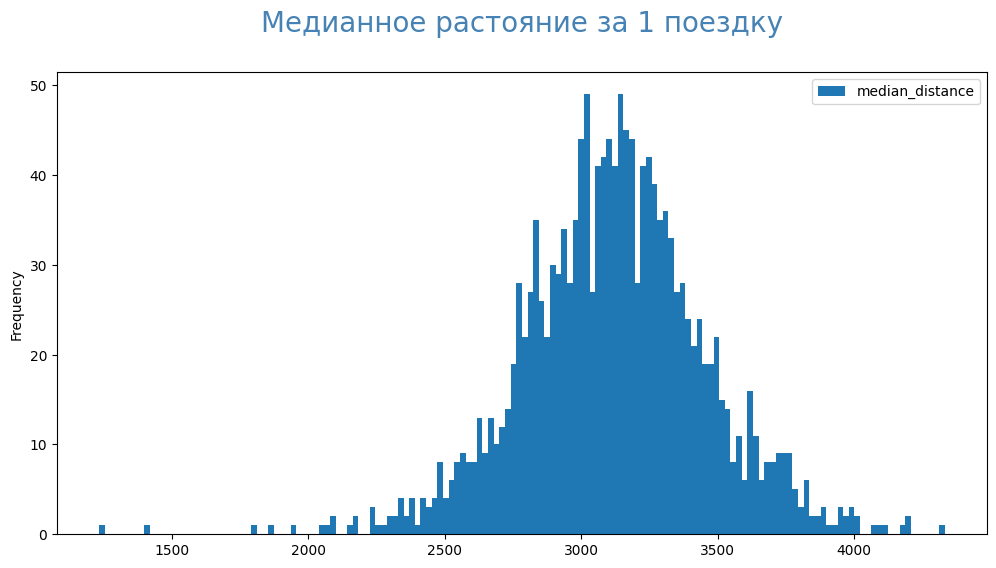

In [24]:
display(rides_users['median_distance'].describe());
display(rides_users.boxplot(column='median_distance', vert=False, figsize=(8,2)));
rides_users.plot(y='median_distance', kind='hist', bins=150, figsize=(12,6)).set_title('Медианное растояние за 1 поездку' + "\n", fontsize=20, color='SteelBlue');

count    1534.000000
mean       17.713325
std         2.287764
min        10.614835
25%        16.203860
50%        17.687754
75%        19.162871
max        29.983174
Name: median_duration, dtype: float64

<AxesSubplot:>

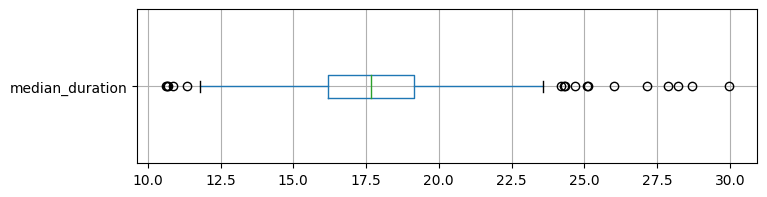

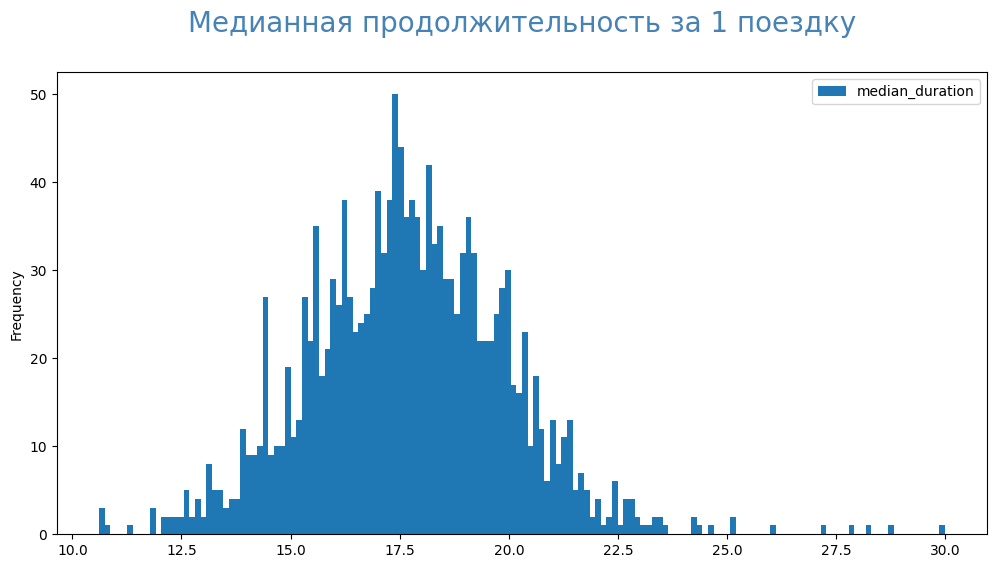

In [25]:
display(rides_users['median_duration'].describe());
display(rides_users.boxplot(column='median_duration', vert=False, figsize=(8,2)));
rides_users.plot(y='median_duration', kind='hist', bins=150, figsize=(12,6)).set_title('Медианная продолжительность за 1 поездку' + "\n", fontsize=20, color='SteelBlue');

Графики напоминают распределение Пуассона. Даже после отсечения редких значений составляющих меньше 1% выборки видны выбросы.

## Обьеденение данных

### Обьеденение всех таблиц в одну 

In [26]:
all_data = rides_data_new.merge(users_data_new, on='user_id', how='right')
all_data = all_data.merge(subscriptions_data, on='subscription_type', how='inner')
all_data.head(20)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


### Создание двух дополнительных таблиц: Клиентов с подпиской и без

In [27]:
all_data_free = all_data[all_data['subscription_type'] == 'free']
all_data_ultra = all_data[all_data['subscription_type'] == 'ultra']
display(all_data_free.head(10))
all_data_ultra.head(10)

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
6374,700,2515.690719,14.944286,2021-01-02,1,Айдар,22,Омск,free,8,50,0
6375,700,846.932642,16.234663,2021-02-01,2,Айдар,22,Омск,free,8,50,0
6376,700,4004.434142,20.016628,2021-02-04,2,Айдар,22,Омск,free,8,50,0
6377,700,1205.911290,9.782872,2021-02-10,2,Айдар,22,Омск,free,8,50,0
6378,700,3047.379435,17.427673,2021-02-14,2,Айдар,22,Омск,free,8,50,0
6379,700,4342.002254,22.368009,2021-02-23,2,Айдар,22,Омск,free,8,50,0
6380,700,3798.334905,18.243756,2021-03-03,3,Айдар,22,Омск,free,8,50,0
6381,700,2984.551206,15.424899,2021-04-09,4,Айдар,22,Омск,free,8,50,0
6382,700,3360.107141,16.765497,2021-06-12,6,Айдар,22,Омск,free,8,50,0
6383,700,2567.543847,11.312160,2021-06-23,6,Айдар,22,Омск,free,8,50,0


,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,4409.919140,25.599769,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199
1,1,2617.592153,15.816871,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199
2,1,754.159807,6.232113,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199
3,1,2694.783254,18.511000,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199
4,1,4028.687306,26.265803,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199
5,1,2770.890808,16.650138,2021-10-09,10,Кира,22,Тюмень,ultra,6,0,199
6,1,3039.020292,14.927879,2021-10-19,10,Кира,22,Тюмень,ultra,6,0,199
7,1,2842.118050,23.117468,2021-11-06,11,Кира,22,Тюмень,ultra,6,0,199
8,1,3412.690668,15.238072,2021-11-14,11,Кира,22,Тюмень,ultra,6,0,199
9,1,748.690645,15.041884,2021-11-22,11,Кира,22,Тюмень,ultra,6,0,199


### Визуализация информации для обеих категорий

In [28]:
ultra_research = all_data_ultra.pivot_table(index='user_id', values=['duration', 'distance'], aggfunc=['count', 'mean', 'median'])
ultra_research.columns = ['count', 'count1', 'duration_mean', 'distance_mean', 'duration_median', 'distance_median']
ultra_research = ultra_research.drop('count1', axis=1)
free_research = all_data_free.pivot_table(index='user_id', values=['duration', 'distance'], aggfunc=['count', 'mean', 'median'])
free_research.columns = ['count', 'count1', 'duration_mean', 'distance_mean', 'duration_median', 'distance_median']
free_research = free_research.drop('count1', axis=1)

count     694.000000
mean     3146.176331
std       260.033367
min      1234.763317
25%      2999.369480
50%      3135.973588
75%      3276.410160
max      4193.746910
Name: duration_median, dtype: float64

<AxesSubplot:>

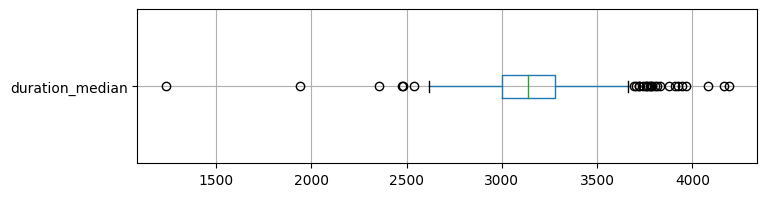

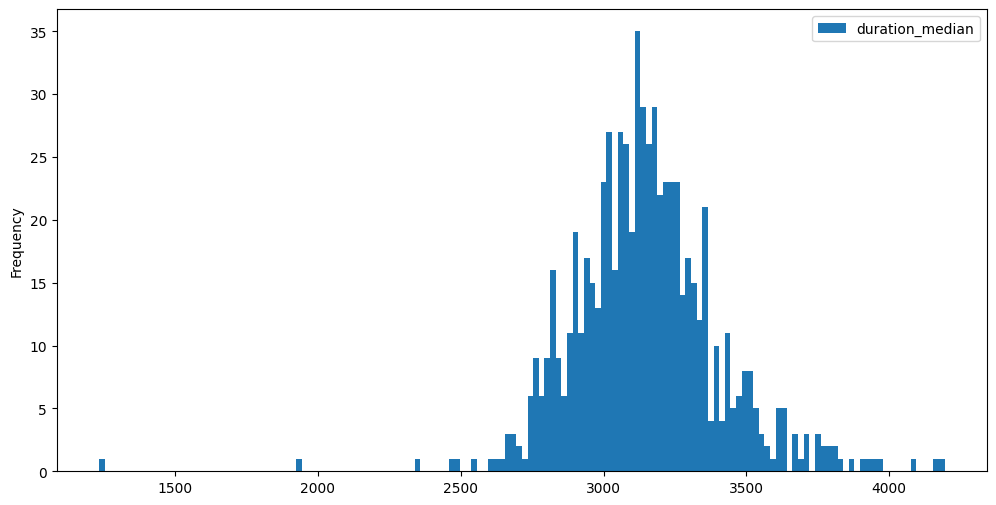

In [29]:
display(ultra_research['duration_median'].describe());
display(ultra_research.boxplot(column='duration_median', vert=False, figsize=(8,2)));
ultra_research.plot(y='duration_median', kind='hist', bins=150, figsize=(12,6));

count     831.000000
mean     3098.494742
std       388.979265
min      1418.863487
25%      2827.110738
50%      3102.083025
75%      3366.657548
max      4331.893867
Name: duration_median, dtype: float64

<AxesSubplot:>

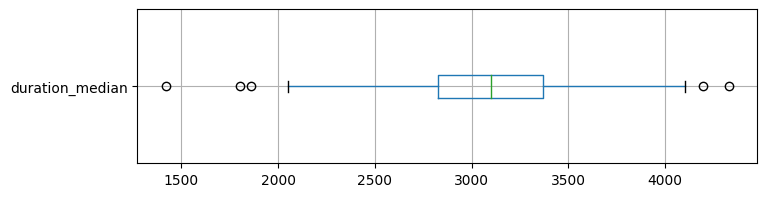

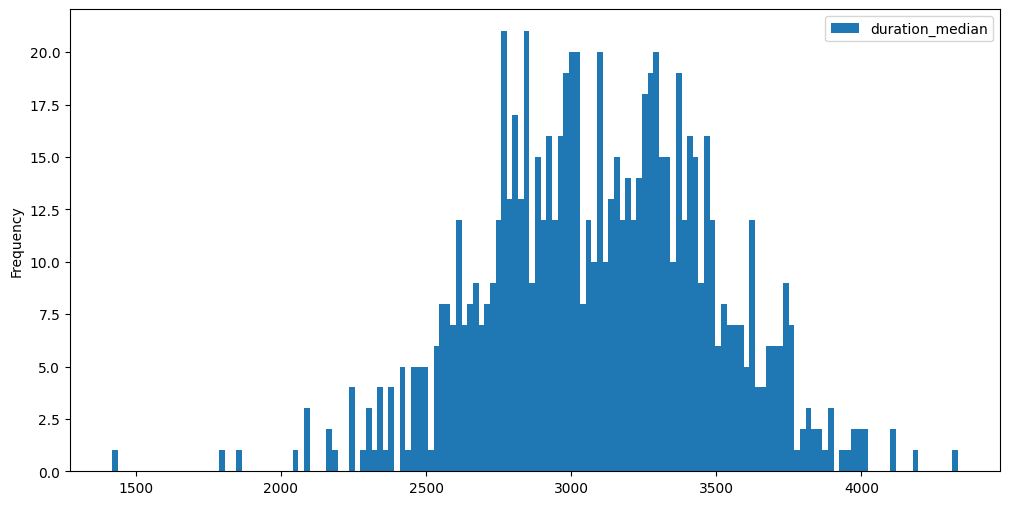

In [30]:
display(free_research['duration_median'].describe());
display(free_research.boxplot(column='duration_median', vert=False, figsize=(8,2)));
free_research.plot(y='duration_median', kind='hist', bins=150, figsize=(12,6));

count    694.000000
mean      18.199117
std        2.328174
min       10.711378
25%       16.653277
50%       18.116009
75%       19.576144
max       29.983174
Name: distance_median, dtype: float64

<AxesSubplot:>

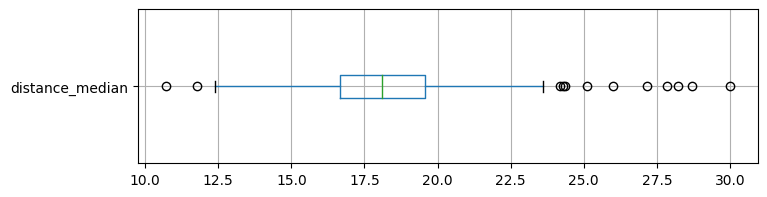

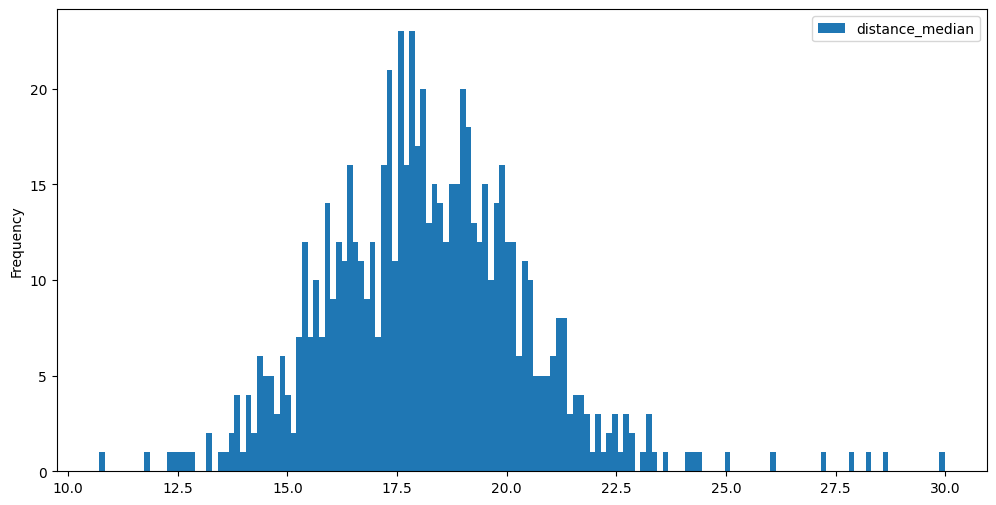

In [31]:
display(ultra_research['distance_median'].describe());
display(ultra_research.boxplot(column='distance_median', vert=False, figsize=(8,2)));
ultra_research.plot(y='distance_median', kind='hist', bins=150, figsize=(12,6));

count    831.000000
mean      17.308329
std        2.182638
min       10.614835
25%       15.833974
50%       17.342416
75%       18.752844
max       25.135593
Name: distance_median, dtype: float64

<AxesSubplot:>

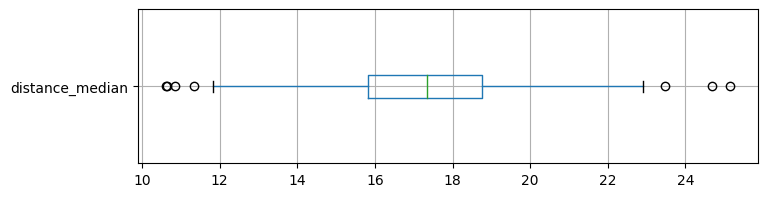

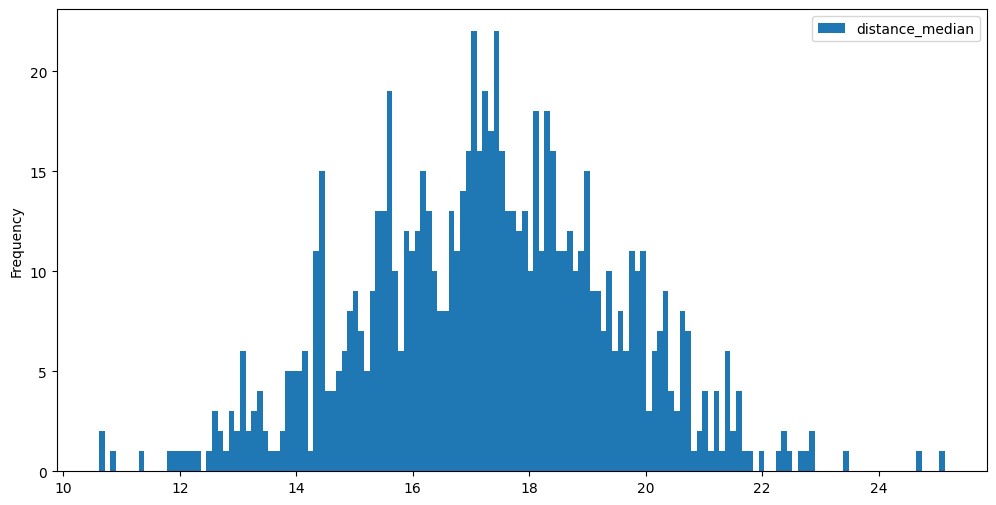

In [32]:
display(free_research['distance_median'].describe());
display(free_research.boxplot(column='distance_median', vert=False, figsize=(8,2)));
free_research.plot(y='distance_median', kind='hist', bins=150, figsize=(12,6));

Можно заметить следующие отличия: данные о пользователях с подпиской имеют больше выбросов и более "узкие" графики. Медианы и по времени и по расстоянию мало отличаются между собой.


## Подсчет выручки

### Таблица с агрегированными данными 

In [33]:
agg_data = all_data.pivot_table(index='user_id', values=['duration', 'distance'], aggfunc=['count', 'sum'])
agg_data.columns = ['count', 'count1', 'distance', 'duration']
agg_data.head()

,count,count1,distance,duration
user_id,,,,
1,12,12,34070.182066,204.604909
2,11,11,33964.058614,197.644279
3,12,12,36907.597866,233.193513
4,13,13,40187.701673,252.666651
5,11,11,35556.949649,174.073932


### Посчет помесячной выручки каждого клиента

In [34]:
import numpy as np

In [35]:
all_data = all_data.merge(agg_data, on='user_id', suffixes=['', '_agg'], how='inner')
all_data['duration'] = np.ceil(all_data['duration'])
all_data.head()

,user_id,distance,duration,date,month,name,age,city,subscription_type,minute_price,start_ride_price,subscription_fee,count,count1,distance_agg,duration_agg
0,1,4409.919140,26.0,2021-01-01,1,Кира,22,Тюмень,ultra,6,0,199,12,12,34070.182066,204.604909
1,1,2617.592153,16.0,2021-01-18,1,Кира,22,Тюмень,ultra,6,0,199,12,12,34070.182066,204.604909
2,1,754.159807,7.0,2021-04-20,4,Кира,22,Тюмень,ultra,6,0,199,12,12,34070.182066,204.604909
3,1,2694.783254,19.0,2021-08-11,8,Кира,22,Тюмень,ultra,6,0,199,12,12,34070.182066,204.604909
4,1,4028.687306,27.0,2021-08-28,8,Кира,22,Тюмень,ultra,6,0,199,12,12,34070.182066,204.604909


In [36]:
def revenue_calculation(row):
    return row['start_ride_price'] + row['minute_price'] * row['duration']

In [37]:
all_data['cost_of_ride'] = all_data.apply(revenue_calculation, axis=1)

In [38]:
data_agg = all_data.pivot_table(index=['user_id', 'month'], values=['cost_of_ride', 'subscription_fee'], aggfunc=['sum', 'first'])
data_agg.columns = ['sum_cost_of_ride', 'tmp', 'tmp1', 'subscription_fee']
data_agg['sum_cost_of_ride'] += data_agg['subscription_fee']
data_agg = data_agg.drop(['tmp', 'tmp1', 'subscription_fee'], axis=1)
all_data = all_data.merge(data_agg, on=['user_id', 'month'], how='inner')

## Проверка гипотез

In [39]:
from scipy import stats as st

### Тратят ли ползователи с подпиской больше времени на поездки?

In [40]:
alpha = .05

results = st.ttest_ind(all_data[all_data['subscription_type'] == 'ultra'].pivot_table(index=['user_id'], values='duration', aggfunc='mean'), 
                       all_data[all_data['subscription_type'] == 'free'].pivot_table(index=['user_id'], values='duration', aggfunc='mean'), 
                       alternative='greater')

display(results.pvalue)
display(results.pvalue < alpha)

array([1.14773892e-22])

array([ True])

Значение P-value позволяет опровергнуть нулевую гипотезу о том, что пользователи с подпиской тратят столько же времени на поездку сколько и пользователи без подписки в пользу альтернативной гипотезы (пользователи с подпиской тратят больше времени на поездку чем пользователи без подписки).

### Превышает ли среднее расстояние подписчиков 3130м?

In [41]:
mu = 3130
alpha = .05

results = st.ttest_1samp(
    all_data_ultra['distance'], 
    mu,
    alternative='less')

display(results.pvalue)

display(results.pvalue < alpha)

0.0032693974945255232

True

Значение P-value позволяет опровергнуть нулевую гипотезу о том, что расстояние, которое проезжает в среднем пользователь с подпиской за одну поездку равно 3130 м в пользу альтернативной гипотезы (расстояние, которое проезжает в среднем за одну поездку пользователь меньше 3130м).

### Будет ли помесячная выручка от пользователей с подпиской выше чем у пользователей без подписки?

Нулевая гипотеза: помесячная выручка от пользователей с подпиской равна помесячной выручке пользоваелей без подписки.
Альтернативная гипотеза: помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки.

In [42]:
alpha = .05

results = st.ttest_ind(all_data[all_data['subscription_type'] == 'ultra'].pivot_table(index=['user_id', 'month'], values='sum_cost_of_ride', aggfunc='first'), 
                       all_data[all_data['subscription_type'] == 'free'].pivot_table(index=['user_id', 'month'], values='sum_cost_of_ride', aggfunc='first'), 
                       alternative='greater')

display(results.pvalue)
display(results.pvalue < alpha)

array([3.67693935e-38])

array([ True])

Отвергаем нулевую гипотезу. 
Помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки.

### Какой тест выбрать

Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки это гипотезы подойдет зависимый t-test для парных выборок (Dependent t-test for paired samples), который реализуется програмно функцией ttest_rel() билиотеки scipy модуля stats. 

## Распределения

### Подбираем такое количество промокодов, чтобы вероятность не выполнить план была не больше 5%.

In [43]:
n = 100
p = 0.1

mu = n * p
sigma = (n * p * (1 - p)) ** .5

distr = st.norm(mu, sigma) 
result = distr.cdf(100)
while result >= .05:
    n += 1
    mu = n * p

    sigma = (n * p * (1 - p)) ** .5
    distr = st.norm(mu, sigma) 
    result = distr.cdf(100)
display(result)
display(n)

0.04971489312694162

1169

### Считаем вероятность того, что уведомление откроют не более 399 500 пользователей.

In [44]:
n = 1000000
p = 0.4

mu = n * p
sigma = (n * p * (1 - p)) ** .5

distr = st.norm(mu, sigma) 
result = distr.cdf(399500)
display(result)

0.15371708296369768

# Общий вывод

## Предобработка данных: 

* в данных не было обнаружено пропусков.
* были обработаны дубликаты (в таблице riders_csv были найдены и удалены явные дубликаты, неявных дубликатов не было найдено)

## Исследовательский анализ данных:

* из выборки удалены редкие значения, которые могут приводить к выбросам (меньше 1% данных);
* исследована найдена частота встречаемости городов в данных: по Пятегорску больше всего данных (217), а по Москве меньше всего (166)
* определено соотношение пользователей с подпиской и без: пользователей с подпиской примерно 45% от всей выборки
* исследован возраст пользователей: зачатую сервисом пользуются люди от 22 до 28 лет
* найдено медианное расстояние за одну поездку (3122м) и медианное время поездок (17.7мин)
    
## Обьединение данных:

* создана таблица, обьединяющая данные всех таблиц. 
* созданы 2 дополнительные таблицы (данные о пользователях с подпиской и без)
* построены графики о расстоянии и времени поездок для пользователей обеих категорий

## Подсчет выручки:

* подсчитана помесячная выручка, приносимая каждым клиентом помесячно и добавлена в общую таблицу

## Проверка гипотез:

* пользователи с подпиской тратят на поездки больше времени чем пользователи без подписки 
* вероятность что среднее расстояние пользователя с подпиской превысит 3130м приверно 0.3%
* помесячная выручка от пользователей с подпиской выше помесячной выручке пользоваелей без подписки

## Рекомендации:

* пользователи с подпиской приносят больше выручки, возможно стоит провести акцию с раздачей промокодов для пользователй без подписки, чтобы часть из них купила подписку
* не стоит сильно переживать об износе самокатов (вряд ли люди будут в среднем за одну поездку ездить больше чем это рекомендовано) 
* если после обновления потребуется определить слизилось ли количество обращений в те поддержку можно воспользоваться зависимым t-test для парных выборок (Dependent t-test for paired samples), который реализуется програмно функцией ttest_rel() билиотеки scipy модуля stats. 